In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import youtube_dl
import moviepy
import librosa
import matplotlib.pyplot as plt
import soundfile
import sklearn

In [3]:
print('pandas version = {}'.format(pd.__version__))
print('numpy version = {}'.format(np.__version__))
print('tensorflow version = {}'.format(tf.__version__))
print('moviepy version = {}'.format(moviepy.__version__))
print('librosa version = {}'.format(librosa.__version__))

pandas version = 0.25.1
numpy version = 1.16.5
tensorflow version = 2.0.0
moviepy version = 1.0.1
librosa version = 0.7.2


**This csv file contains youtube link for different types of videos containing different sounds.
Useful fields are link-part, Duration of the audio, Corresponding label (Police/Ambulance/Fire Truck)**

In [4]:
data_file = pd.read_csv('unbalanced_train_segments.csv')

C:\Users\Swaraj Badhei\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
print('No of instances = {}\nNo of Columns = {}'.format(data_file.shape[0],data_file.shape[1]))
print('Columns are as follows-:\n{}'.format(data_file.columns))

No of instances = 1048572
No of Columns = 18
Columns are as follows-:
Index(['---1_cCGK4M', '0', '10', ' "/m/01g50p', '/m/0284vy3', '/m/06d_3',
       '/m/07jdr', '/m/07rwm0c"', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')


In [11]:
targets=data_file.values[:,3:]

### Next up, we need to separate the links for different labels(Emergency Vehicles in our case).#
Useful data are as follows:
#Link
#Starting time of audio part
#Ending time of audio part

In [14]:
#tags got from the documentaion for the audio dataset
#Takes a bit of time..so not recommended to run each time.
police='/m/04qvtq'
ambu='/m/012n7d'
fire='/m/012ndj'
emer='/03j1ly'
emer_lst=[]
police_lst=[]
ambu_lst=[]
fire_lst=[]
for i in range(targets.shape[0]):
    if police in targets[i,:]:
        police_lst.append([data_file.iloc[i,0],data_file.iloc[i,1],data_file.iloc[i,2]])
    elif fire in targets[i,:]:
        fire_lst.append([data_file.iloc[i,0],data_file.iloc[i,1],data_file.iloc[i,2]])
    elif ambu in targets[i,:]:
        ambu_lst.append([data_file.iloc[i,0],data_file.iloc[i,1],data_file.iloc[i,2]])
    else:
        pass

In [15]:
print('No of Police Car instances = {}'.format(len(police_lst)))
print('No of Fire Truck instances = {}'.format(len(fire_lst)))
print('No of Ambulanece instances = {}'.format(len(ambu_lst)))

No of Police Car instances = 242
No of Fire Truck instances = 213
No of Ambulanece instances = 30


#### Here comes up the downloading part
#1.Download the audio file from youtube
#2.Clip the audio file as per got starting and ending time
#3.Delete the previous audio file downloaded
#4.Save the clipped audio

In [ ]:
#for the record...dont fuck with this now...it just works
'''for i in range(np.array(ambu_lst).shape[0]):
    try:
        ts=ambu_lst[i][1]
        te=ambu_lst[i][2]
        #print(te,ts)
        y_id=ambu_lst[i][0]
        video_url='https://www.youtube.com/watch?v={}'.format(y_id)
        video=pafy.new(video_url)
        best_audio=video.getbestaudio()
        audio_name=best_audio.filename
        best_audio.download()
        if os.path.exists(audio_name):
            output_file='Ambulance_'+str(i)+'.webm'
            ffmpeg_extract_subclip(audio_name,ts,te,targetname=output_file)
            os.remove(audio_name)
        print("DONE FOR {}".format(i+1))
    except:
        print('Error in file : '.format(i+1))'''

### For Audio visualization part Go to "audio_visualization_file.ipynb"

### Data Preparation to store in .csv file please refer to "final_code_for_feature_extraction"

### Deep Learning part
#### 1. Reading data from previously prepared .csv file
#### 2. Preparing one simple Dense net
#### 3. Feeding and training

In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam,SGD
import sklearn
import matplotlib.pyplot as plt

In [2]:
print("tensorflow version = {}".format(tf.__version__))
print("numpy version = {}".format(np.__version__))
print("pandas version = {}".format(pd.__version__))
print("scikit-learn version = {}".format(sklearn.__version__))

tensorflow version = 2.0.0
numpy version = 1.16.5
pandas version = 0.25.1
scikit-learn version = 0.21.3


In [7]:
feature_file=pd.read_csv('feature/final_feature.csv').values

In [8]:
target_file=pd.read_csv('feature/final_targets.csv').values

In [13]:
print("Total no of data points = {}\nTotal no of Features = {}".format(target_file.shape[0],target_file.shape[1]))

Total no of data points = 301
Total no of Features = 1


In [14]:
feature_file=feature_file.reshape(301,861,40)
print('Shape of datapoint set = {}'.format(feature_file.shape))

Shape of datapoint set = (301, 861, 40)


In [15]:
ohe=OneHotEncoder(categories='auto')
onehot_target=ohe.fit_transform(target_file.reshape(-1,1)).todense()
print('Shape of Target Vector = {}'.format(onehot_target.shape))

Shape of Target Vector = (301, 3)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(feature_file, onehot_target, test_size=0.15, random_state=42)

In [17]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(861,40)),
    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 34440)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              35267584  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6

In [19]:
adam=Adam(lr=0.001,decay=0.0001)
sgd=SGD(lr=0.001,decay=0.0001)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['acc'])

In [23]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Train on 255 samples, validate on 46 samples
Epoch 1/10
255/255 [==============================] - 4s 15ms/sample - loss: 66.8572 - acc: 0.3490 - val_loss: 67.6783 - val_acc: 0.5870
Epoch 2/10
255/255 [==============================] - 2s 7ms/sample - loss: 34.2662 - acc: 0.5333 - val_loss: 22.1390 - val_acc: 0.5870
Epoch 3/10
255/255 [==============================] - 2s 7ms/sample - loss: 29.4684 - acc: 0.4275 - val_loss: 17.8237 - val_acc: 0.3261
Epoch 4/10
255/255 [==============================] - 2s 7ms/sample - loss: 17.0272 - acc: 0.4275 - val_loss: 8.9734 - val_acc: 0.5870
Epoch 5/10
255/255 [==============================] - 2s 7ms/sample - loss: 8.0507 - acc: 0.4588 - val_loss: 4.0002 - val_acc: 0.5870
Epoch 6/10
255/255 [==============================] - 2s 7ms/sample - loss: 2.0671 - acc: 0.5569 - val_loss: 1.4875 - val_acc: 0.4565
Epoch 7/10
255/255 [==============================] - 2s 7ms/sample - loss: 1.0554 - acc: 0.5804 - val_loss: 1.3858 - val_acc: 0.4348
Epoch 8/1

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

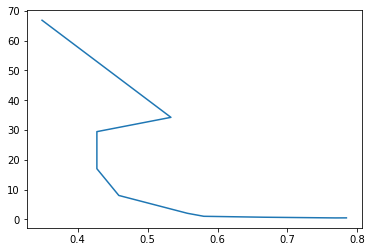

In [26]:
plt.plot(history.history['acc'],history.history['loss'])